In [0]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

In [4]:
cd "/content/drive/My Drive/Colab Notebooks/dw_matrix"


/content/drive/My Drive/Colab Notebooks/dw_matrix


In [5]:
ls data

men_shoes.csv


In [8]:
df = pd.read_csv('data/men_shoes.csv', low_memory=False)
df.shape

(18280, 48)

In [9]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [10]:
mean_price = np.mean( df['prices_amountmin'])
mean_price

93.53952188183217

In [12]:
[3]*5

[3, 3, 3, 3, 3]

In [15]:
y_true = df['prices_amountmin']
y_pred = [mean_price] * y_true.shape[0]
mean_absolute_error(y_true, y_pred)

63.968341227870624

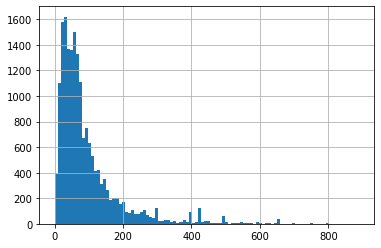

In [16]:
df['prices_amountmin'].hist(bins=100)

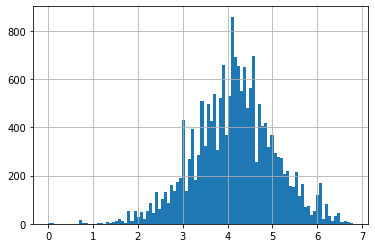

In [19]:
np.log( df['prices_amountmin'] + 1) .hist(bins=100)

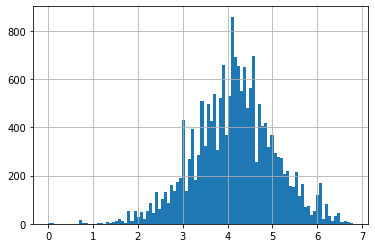

In [20]:
np.log1p( df['prices_amountmin'] ) .hist(bins=100)

In [21]:
y_true = df['prices_amountmin']
y_pred = [np.median(y_true)] * y_true.shape[0]
mean_absolute_error(y_true, y_pred)

58.01120240700219

In [0]:
y_true = df['prices_amountmin']
price_log_mean = np.mean ( np.log1p(y_true) )
y_pred = [] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)

In [24]:
np.log1p(y_true)

0        3.710886
1        3.970103
2        3.714060
3        3.937886
4        3.855664
           ...   
18275    3.432373
18276    4.188897
18277    3.510948
18278    3.480625
18279    4.290459
Name: prices_amountmin, Length: 18280, dtype: float64

In [26]:
np.mean(np.log1p(y_true))

4.157759197235119

In [27]:
np.exp(np.mean(np.log1p(y_true)))-1

62.92811169273113

In [28]:
y_true = df['prices_amountmin']
price_log_mean = np.expm1(np.mean(np.log1p(y_true)))
y_pred = [price_log_mean] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)

58.03539547661041

In [29]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [30]:
df.brand.value_counts()

Nike                           1709
PUMA                            574
Ralph Lauren                    524
New Balance                     361
VANS                            356
                               ... 
Emu                               1
Adidas Crazy1 Kobe BB shoes       1
Extreme Storm                     1
Tallia                            1
Dan Post Boots                    1
Name: brand, Length: 1856, dtype: int64

In [31]:
df ['brand'].factorize()

(array([  0,   0,   1, ..., 411, 411, 411]),
 Index(['Josmo', 'SERVUS BY HONEYWELL', 'NATIVE', 'MAUI AND SONS', 'Twisted X',
        'Lacoste', 'Rubies', 'unbranded', 'PUMA', 'Filament',
        ...
        'Bindi', 'Holloway Sportswear', 'River City', 'AH by Android Homme',
        'SEG', 'American Rag', 'BININBOX', 'HEAD', 'Swix', 'Xray, XRay'],
       dtype='object', length=1856))

In [32]:
df ['brand'].factorize()[0]

array([  0,   0,   1, ..., 411, 411, 411])

In [0]:
df['brand_cat'] =  df ['brand'].factorize()[0]

In [38]:
feats =['brand_cat']
X = df[feats].values
y = df['prices_amountmin'].values

model=DecisionTreeRegressor (max_depth=5)

scores = cross_val_score (model, X, y, scoring='neg_mean_absolute_error')
np.mean(scores), np.std(scores)

(-58.38655694633361, 4.223555478221712)

In [0]:
def run_model(feats):
  X = df[feats].values
  y = df['prices_amountmin'].values

  model=DecisionTreeRegressor (max_depth=5)

  scores = cross_val_score (model, X, y, scoring='neg_mean_absolute_error')
  return np.mean(scores), np.std(scores)

In [40]:
run_model(['brand_cat'])

(-58.38655694633361, 4.223555478221712)

In [0]:
df['manufacturer_cat'] =  df ['manufacturer'].factorize()[0]

In [42]:
run_model(['manufacturer_cat'])

(-63.133649278023746, 3.394307434888982)

In [43]:
run_model(['manufacturer_cat', 'brand_cat'])

(-58.539304199085976, 4.311223231615426)

In [44]:
ls

data/  HelloGithub.ipynb  LICENSE  matrix_one/  README.md


In [46]:
ls matrix_one

Day3.ipynb


In [55]:
cd "/content/drive/My Drive/Colab Notebooks/dw_matrix"

/content/drive/My Drive/Colab Notebooks/dw_matrix


In [56]:
ls

data/  HelloGithub.ipynb  LICENSE  matrix_one/  README.md


In [57]:
ls matrix_one

Day3.ipynb  day4.ipynb


In [58]:
!git add matrix_one/day4.ipnyb

fatal: pathspec 'matrix_one/day4.ipnyb' did not match any files


In [0]:
!git add matrix_one/day4.ipynb

In [64]:
!git commit -m "price prediction"


*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@9057a19e60c8.(none)')


In [0]:
!git config --global user.email "sonatagosia@gmail.com"
!git config --global user.name "Malgorzata"

In [67]:
!git push -u origin master

Branch 'master' set up to track remote branch 'master' from 'origin'.
Everything up-to-date


In [0]:
!git 